# Práctica 2: Modelo cinemático inverso de un  y planteamiento de trayectoria

## 0bjetivo

El objetivo de esta práctica es que el alumno comprenda, interprete y modifique la información básica de los formatos de Universal Robot Description File (URDF).


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno grafique y analice los resultados del modelo
- Que el alumno configure un repositorio en línea e incluya en éste su práctica

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
| ------:| ----------- |
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

| Elemento | Malo | Regular | Bueno |
| ------:| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Transformaciones homogéneas
Las transformaciones homogéneas permiten hacer el planteamiento del modelo cinemático de un robot, considerando las posiciones y orientaciones de las juntas del robot respecto al sistema de referencia de una junta anterior

Este planteamiento es el **modelo de cinemática directa**, que nos permite obtener la posición y velocidad del efector final de un manipulador en términos de los valores de la posición y velocidad de sus juntas (espacio de trabajo)

A través de este modelo se puede obtener el **modelo de cinemática inversa**, que permite obtener la velocidad de las juntas de un robot a partir de la velocidad deseada del efector final.

### Planteamiento de una trayectoria
Si se conoce el punto inicial y final de una trayectoria deseada, se pueden obtener los puntos intermedios de la trayectoria. La forma más fácil de realizar esta interpolación es a través de un spline. El orden del spline permitirá controlar las condiciones inicial y final de la posición, velocidad ó aceleración que tendrá el efector final durante el trayecto. 

Juntando la interpolación de la trayectoria y el modelo de la cinemática inversa, se pueden obtener todos los puntos intermedios de la trayectoria que deben seguir las juntas del robot para que el efector final siga una trayectoria.

## Cuestionario previo

Responder de forma breve las siguientes preguntas:

- ¿Qué es el análisis de dinámica inversa y qué nos permite obtener?
- ¿A través de qué modelados se puede realizar un análisis de dinámica inversa?
- ¿De qué condiciones ó fenómenos físicos dependen los pares en las juntas de un robot para seguir una trayectoria?
- ¿Cómo se aplica la derivada total de una función que está en términos de otras variables que a su vez están en términos de la variable respecto a la que se realzia la derivada total?

En caso de integrar imagenes, colocarlas en la carpeta *"imagenes"*

## Desarrollo

### 1. Planteamiento de la cinemática inversa y obtención de la trayectoria
En esta primera parte, se realiza el análisis de la cinemática inversa, que permite obtener las posiciones, velocidades y aceleraciones de las juntas del robot, dada **una posición inicial de las juntas y una posición final del efector final**. Se puede retomar de la práctica anterior. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/P3_IM1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>



In [1]:
from sympy import *
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def trans_homo(x, y, z, gamma, beta, alpha):
    T = Matrix([[cos(alpha)*cos(beta), -sin(alpha)*cos(gamma)+sin(beta)*sin(gamma)*cos(alpha), sin(alpha)*sin(gamma)+sin(beta)*cos(alpha)*cos(gamma), x],
         [sin(alpha)*cos(beta), sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma), sin(alpha)*sin(beta)*cos(gamma)-sin(gamma)*cos(alpha), y],
        [-sin(beta), sin(gamma)*cos(beta), cos(beta)*cos(gamma), z],[0, 0, 0, 1]])
    return T 

In [3]:
dim = (0.3, 0.3, 0.3)
base_dim = (0, 0, 0.1)
base_rot = (pi/2, 0, 0)
mass = (10, 10, 10)
#Variables para cinemática directa
theta_0_1 = Symbol('theta_0_1')
theta_1_2 = Symbol('theta_1_2')
theta_2_3 = Symbol('theta_2_3')
#Grados de libertad
x_0_P = Symbol('x_0_P')
z_0_P = Symbol('y_0_P')
theta_0_P = Symbol('theta_0_P')
#Velocidades
x_0_P_dot = Symbol('x_0_P_dot')
z_0_P_dot = Symbol('y_0_P_dot')
theta_0_P_dot = Symbol('theta_0_P_dot')
#Transformaciones homogéneas
T_0_0 = trans_homo(base_dim[0], base_dim[1], base_dim[2], base_rot[0], base_rot[1], base_rot[2])
T_0_1 = trans_homo(0, 0, 0, 0, 0, theta_0_1)
T_1_2 = trans_homo(dim[0], 0, 0, 0, 0, theta_1_2)
T_2_3 = trans_homo(dim[1], 0, 0, 0, 0, theta_2_3)
T_3_P = trans_homo(dim[2], 0, 0, 0, 0, 0)
T_0_1 = simplify(T_0_0 * T_0_1)
T_0_2 = simplify(T_0_1 * T_1_2)
T_0_3 = simplify(T_0_2 * T_2_3)
T_0_P = simplify(T_0_3 * T_3_P)
T_0_P = simplify(T_0_P)

xi_0_P = Matrix([T_0_P[0, 3], T_0_P[2, 3], theta_0_1 + theta_1_2 + theta_2_3])
J = Matrix.hstack(diff(xi_0_P, theta_0_1), diff(xi_0_P, theta_1_2), diff(xi_0_P, theta_2_3))
J_inv = J.inv()

In [4]:
frec = 30
time = (0, 10)
gdl_in = (0.8, 0.1, 0)
q_in = (0.1, 0.1, 0.1)
gdl_fn = (0.4, 0.4, 1.57)
a_0, a_1, a_2, a_3, a_4, a_5, t = symbols('a_0 a_1 a_2 a_3 a_4 a_5 t')
lam = a_0 + a_1*t + a_2*(t**2) + a_3*(t**3) + a_4*(t**4) + a_5*(t**5)
lam_dot = diff(lam, t)
lam_dot_dot = diff(lam_dot, t)
terms = solve([
      lam.subs(t, time[0]) - 0,
      lam.subs(t, time[1]) - 1,
      lam_dot.subs(t, time[0]) - 0,
      lam_dot.subs(t, time[1]) - 0,
      lam_dot_dot.subs(t, time[0]) - 0,
      lam_dot_dot.subs(t, time[1]) - 0], [a_0, a_1, a_2, a_3, a_4, a_5], dict = True)
#Lambda con valores sustituidos
lam_s = lam.subs(terms[0])
lam_s_dot = lam_dot.subs(terms[0])
lam_s_dot_dot = lam_dot_dot.subs(terms[0])
samples = frec * (time[1] - time[0]) + 1
dt = 1.0 / frec
#Posición inicial del efector final
gdl_in = T_0_P[:3, 3].subs({theta_0_1: q_in[0], theta_1_2: q_in[1], theta_2_3: q_in[2]})
#Creando arreglos para guardar las posiciones de los GDL
gdl = []
gdl_dot = []
gdl_dot_dot = []
for a in range(samples):
    gdl.append((gdl_in[0] + lam_s.subs(t, time[0] + float(a)/frec) * (gdl_fn[0] - gdl_in[0]),
              gdl_in[1] + lam_s.subs(t, time[0] + float(a)/frec) * (gdl_fn[1] - gdl_in[1]), 
              gdl_in[2] + lam_s.subs(t, time[0] + float(a)/frec) * (gdl_fn[2] - gdl_in[2]) ))
    gdl_dot.append((lam_s_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[0] - gdl_in[0]),
                  lam_s_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[1] - gdl_in[1]), 
                  lam_s_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[2] - gdl_in[2]) ))
    gdl_dot_dot.append((lam_s_dot_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[0] - gdl_in[0]),
                  lam_s_dot_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[1] - gdl_in[1]), 
                  lam_s_dot_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[2] - gdl_in[2]) ))
#0bteniendo posición inicial del ws
xi_desp = xi_0_P - Matrix([gdl_in[0], gdl_in[1], gdl_in[2]])
#Calculando velocidad inicial
xi_0_P_dot = Matrix([x_0_P_dot, z_0_P_dot, theta_0_P_dot])
q_0_P_dot = J_inv * xi_0_P_dot
#Arreglos para guardar las posiciones del ws
ws = []
ws_dot = []
ws_dot_dot = []
#Agregando posición inicial
ws.append(q_in)
#Agregando velocidad inicial
q_dot_in = q_0_P_dot.subs({
    x_0_P_dot:     gdl_dot[0][0],
    z_0_P_dot:     gdl_dot[0][1],
    theta_0_P_dot: gdl_dot[0][2],
    theta_0_1: ws[0][0],
    theta_1_2: ws[0][1],
    theta_2_3: ws[0][2]})
ws_dot.append(q_dot_in)
#Calculando todos los valores por cinemática inversa
for a in range(samples - 1):
    #Posición 
    ws.append((ws[a][0] + ws_dot[a][0] * dt, ws[a][1] + ws_dot[a][1] * dt, ws[a][2] + ws_dot[a][2] * dt))
    #Velocidad
    q_dot_iter = q_0_P_dot.subs({   x_0_P_dot:     gdl_dot[a+1][0],
                                  z_0_P_dot:     gdl_dot[a+1][1],
                                  theta_0_P_dot: gdl_dot[a+1][2],
                                  theta_0_1: ws[a+1][0],
                                  theta_1_2: ws[a+1][1],
                                  theta_2_3: ws[a+1][2]})
    ws_dot.append(q_dot_iter)
    #Aceleración
    ws_dot_dot.append(((ws_dot[a+1][0]-ws_dot[a][0]) / dt, (ws_dot[a+1][1]-ws_dot[a][1]) / dt, (ws_dot[a+1][2]-ws_dot[a][2]) / dt))
    #print("Iteración: " + str(a))
#Aceleración final
ws_dot_dot.append((0,0,0))

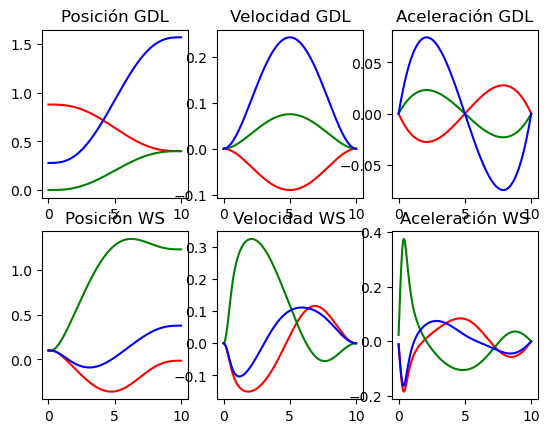

In [5]:
#Grados de libertad
gdl_t = []
gdl_p_0 = []
gdl_p_1 = []
gdl_p_2 = []
gdl_v_0 = []
gdl_v_1 = []
gdl_v_2 = []
gdl_a_0 = []
gdl_a_1 = []
gdl_a_2 = []
#Espacio de trabajo
ws_t = []
ws_p_0 = []
ws_p_1 = []
ws_p_2 = []
ws_v_0 = []
ws_v_1 = []
ws_v_2 = []
ws_a_0 = []
ws_a_1 = []
ws_a_2 = []

for i in range(len(gdl)):
    gdl_t.append(float(i) / frec)
    gdl_p_0.append(gdl[i][0])
    gdl_p_1.append(gdl[i][1])
    gdl_p_2.append(gdl[i][2])
    gdl_v_0.append(gdl_dot[i][0])
    gdl_v_1.append(gdl_dot[i][1])
    gdl_v_2.append(gdl_dot[i][2])
    gdl_a_0.append(gdl_dot_dot[i][0])
    gdl_a_1.append(gdl_dot_dot[i][1])
    gdl_a_2.append(gdl_dot_dot[i][2])
for i in range(len(ws)):
    ws_t.append(float(i) / frec)
    ws_p_0.append(ws[i][0])
    ws_p_1.append(ws[i][1])
    ws_p_2.append(ws[i][2])
    ws_v_0.append(ws_dot[i][0])
    ws_v_1.append(ws_dot[i][1])
    ws_v_2.append(ws_dot[i][2])
    ws_a_0.append(ws_dot_dot[i][0])
    ws_a_1.append(ws_dot_dot[i][1])
    ws_a_2.append(ws_dot_dot[i][2])
fig, ((gdl_plot, gdl_dot_plot, gdl_dot_dot_plot), (ws_plot, ws_dot_plot, ws_dot_dot_plot),) = plt.subplots(nrows = 2, ncols = 3)    
#Gráficas GDL
gdl_plot.set_title("Posición GDL")
gdl_plot.plot(gdl_t, gdl_p_0, color = "RED")
gdl_plot.plot(gdl_t, gdl_p_1, color = "GREEN")
gdl_plot.plot(gdl_t, gdl_p_2, color = "BLUE")
gdl_dot_plot.set_title("Velocidad GDL") 
gdl_dot_plot.plot(gdl_t, gdl_v_0, color = "RED")
gdl_dot_plot.plot(gdl_t, gdl_v_1, color = "GREEN")
gdl_dot_plot.plot(gdl_t, gdl_v_2, color = "BLUE")
gdl_dot_dot_plot.set_title("Aceleración GDL")
gdl_dot_dot_plot.plot(gdl_t, gdl_a_0, color = "RED")
gdl_dot_dot_plot.plot(gdl_t, gdl_a_1, color = "GREEN")
gdl_dot_dot_plot.plot(gdl_t, gdl_a_2, color = "BLUE")
#Gráficas WS
ws_plot.set_title("Posición WS")
ws_plot.plot(ws_t, ws_p_0, color = "RED")
ws_plot.plot(ws_t, ws_p_1, color = "GREEN")
ws_plot.plot(ws_t, ws_p_2, color = "BLUE")
ws_dot_plot.set_title("Velocidad WS")
ws_dot_plot.plot(ws_t, ws_v_0, color = "RED")
ws_dot_plot.plot(ws_t, ws_v_1, color = "GREEN")
ws_dot_plot.plot(ws_t, ws_v_2, color = "BLUE")
ws_dot_dot_plot.set_title("Aceleración WS")
ws_dot_dot_plot.plot(ws_t, ws_a_0, color = "RED")
ws_dot_dot_plot.plot(ws_t, ws_a_1, color = "GREEN")
ws_dot_dot_plot.plot(ws_t, ws_a_2, color = "BLUE")
plt.show()

### 2. Planteamiento de la dinámica inversa: Posiciones de los centros de masa
A partir de las matrices de transformación homogénea, obtener la posición de los centros de masa de los eslabones.

In [6]:
#Transformaciones de centros de masa
T_1_C1 = trans_homo(dim[0] / 2, 0, 0, 0, 0, 0)
T_2_C2 = trans_homo(dim[1] / 2, 0, 0, 0, 0, 0)
T_3_C3 = trans_homo(dim[2] / 2, 0, 0, 0, 0, 0)
T_0_C1 = simplify(T_0_1 * T_1_C1)
T_0_C2 = simplify(T_0_2 * T_2_C2)
T_0_C3 = simplify(T_0_3 * T_3_C3)
#Vectores de posición de sistemas de referencia
p_0_1 = T_0_1[:3, 3]
p_1_2 = T_1_2[:3, 3]
p_2_3 = T_2_3[:3, 3]
p_0_1 = T_0_1[:3, 3]
p_0_2 = T_0_2[:3, 3]
p_0_3 = T_0_3[:3, 3]
#Vectores de posición de centros de masa
p_1_C1 = T_1_C1[:3, 3]
p_2_C2 = T_2_C2[:3, 3]
p_3_C3 = T_3_C3[:3, 3]
p_0_C1 = T_0_C1[:3, 3]
p_0_C2 = T_0_C2[:3, 3]
p_0_C3 = T_0_C3[:3, 3]
#Rotaciones
R_0_1 = T_0_1[:3, :3]
R_1_2 = T_1_2[:3, :3]
R_2_3 = T_2_3[:3, :3]

### 3. Planteamiento de la dinámica inversa: Velocidades de los centros de masa

A partir de las ecuaciones de propagación de la velocidad, obtener la posición de los centros de masa de los eslabones.

In [7]:
#Velocidades angulares
theta_0_1_dot = Symbol('theta_0_1_dot')
theta_1_2_dot = Symbol('theta_1_2_dot')
theta_2_3_dot = Symbol('theta_2_3_dot')
#Velocidades angulares de sistemas
omega_1_1 = Matrix([0, 0, theta_0_1_dot])
omega_2_2 = R_1_2.transpose() @ omega_1_1 + Matrix([0, 0, theta_1_2_dot])
omega_3_3 = R_2_3.transpose() @ omega_2_2 + Matrix([0, 0, theta_2_3_dot]) 
#Velocidades angulares de centros de masa
omega_1_C1 = omega_1_1
omega_2_C2 = omega_2_2
omega_3_C3 = omega_3_3
#Velocidades lineales de sistemas
v_1_1 = Matrix([0, 0, 0])
v_2_2 = R_1_2.transpose() @ (omega_1_1.cross(p_1_2))
v_3_3 = R_2_3.transpose() @ (omega_2_2.cross(p_2_3))
#Velocidades lineales de centros de masa
v_1_C1 = v_1_1 + omega_1_1.cross(p_1_C1)
v_2_C2 = v_2_2 + omega_2_2.cross(p_2_C2)
v_3_C3 = v_3_3 + omega_3_3.cross(p_3_C3)
#Arreglos para guardar velocidades angulares
om_1_C1 = []
om_2_C2 = []
om_3_C3 = []
#Arreglos para guardar velocidades lineales
vel_1_C1 = []
vel_2_C2 = []
vel_3_C3 = []
#Ciclo para todas las muestras
for i in range(len(ws)):
    #Velocidades angulares
    om_1_C1.append(omega_1_C1.subs({
        theta_0_1_dot: ws_dot[i][0]
    }))
    om_2_C2.append(omega_2_C2.subs({
        theta_0_1_dot: ws_dot[i][0],
        theta_1_2_dot: ws_dot[i][1]
    }))
    om_3_C3.append(omega_3_C3.subs({
        theta_0_1_dot: ws_dot[i][0],
        theta_1_2_dot: ws_dot[i][1],
        theta_2_3_dot: ws_dot[i][2]
    }))
    #Velocidades lineales
    vel_1_C1.append(v_1_C1.subs({
        theta_0_1: ws[i][0],
        theta_0_1_dot: ws_dot[i][0]
    }))
    vel_2_C2.append(v_2_C2.subs({
        theta_0_1: ws[i][0],
        theta_1_2: ws[i][1],
        theta_0_1_dot: ws_dot[i][0],
        theta_1_2_dot: ws_dot[i][1]
    }))
    vel_3_C3.append(v_3_C3.subs({
        theta_0_1: ws[i][0],
        theta_1_2: ws[i][1],
        theta_2_3: ws[i][2],
        theta_0_1_dot: ws_dot[i][0],
        theta_1_2_dot: ws_dot[i][1],
        theta_2_3_dot: ws_dot[i][2]
    }))

### 4. Planteamiento de la dinámica inversa: Matrices de inercia

Calcular las matrices de inercia de los eslabones considerando que su centro de masa concide con su centroide y constan de un prisma con las dimensiones usadas en el archivo URDF del robot.

In [8]:
Id = Matrix([[1,0,0], [0,1,0], [0,0,1]]) 
#Masas
m1 = mass[0]
m2 = mass[1]
m3 = mass[2]
#Matrices de Inercia
Ic1 = Matrix([[(m1/12)*(0.03**2 + 0.03**2), 0, 0], [0, (m1/12)*(0.3**2 + 0.03**2), 0], [0, 0, (m1/12)*(0.3**2 + 0.03**2)]])
Ic2 = Matrix([[(m1/12)*(0.03**2 + 0.03**2), 0, 0], [0, (m1/12)*(0.3**2 + 0.03**2), 0], [0, 0, (m1/12)*(0.3**2 + 0.03**2)]])
Ic3 = Matrix([[(m1/12)*(0.03**2 + 0.03**2), 0, 0], [0, (m1/12)*(0.3**2 + 0.03**2), 0], [0, 0, (m1/12)*(0.3**2 + 0.03**2)]])
#Aceleraciones angulares
theta_0_1_dot_dot = Symbol('theta_0_1_dot_dot')
theta_1_2_dot_dot = Symbol('theta_1_2_dot_dot')
theta_2_3_dot_dot = Symbol('theta_2_3_dot_dot')
omega_1_1 = Matrix([0, 0, theta_0_1_dot])
omega_2_2 = Matrix([0, 0, theta_1_2_dot])
omega_3_3 = Matrix([0, 0, theta_2_3_dot])
#Gravedad
g = -9.81

### 5. Cálculo del Lagrangiano
Para calcular el Lagrangiano, calcular también las energías cinética y potencial de cada eslabón, y sumarlas. 

In [9]:
#Euler-Lagrange
#Energía cinética
k1 = 0.5 * m1 * v_1_C1.dot(v_1_C1) + 0.5 * omega_1_C1.dot(Ic1@omega_1_C1)
k2 = 0.5 * m2 * v_2_C2.dot(v_2_C2) + 0.5 * omega_2_C2.dot(Ic1@omega_2_C2)
k3 = 0.5 * m3 * v_3_C3.dot(v_3_C3) + 0.5 * omega_3_C3.dot(Ic1@omega_3_C3)
k = k1 + k2 + k3
#Energía potencial
u1 = - m1 * Matrix([0, 0, g]).dot(p_0_C1)
u2 = - m2 * Matrix([0, 0, g]).dot(p_0_C2)
u3 = - m3 * Matrix([0, 0, g]).dot(p_0_C3)
u = u1 + u2 + u3
#Lagrangiano
La = k - u

### 6. Pares en las juntas
Para calcular los pares en las juntas del robot, calcular las parciales del Lagrangiano respecto a las variables que lo componen, y sustituirlas en la ecuación de Euler-Lagrange.

In [10]:
#Derivadas respecto al espacio de trabajo
La_dot_q = Matrix([diff(La, theta_0_1), 
                   diff(La, theta_1_2), 
                   diff(La, theta_2_3)])
#Derivadas respecto a la derivada del espacio de trabajo
La_dot_q_dot = Matrix([diff(La, theta_0_1_dot), 
                        diff(La, theta_1_2_dot), 
                        diff(La, theta_2_3_dot)])
#Derivada total
La_dot_q_dot_dt = diff(La_dot_q_dot, theta_0_1) * theta_0_1_dot + diff(La_dot_q_dot, theta_1_2) * theta_1_2_dot + diff(La_dot_q_dot, theta_2_3) * theta_2_3_dot     + diff(La_dot_q_dot, theta_0_1_dot) * theta_0_1_dot_dot + diff(La_dot_q_dot, theta_1_2_dot) * theta_1_2_dot_dot + diff(La_dot_q_dot, theta_2_3_dot) * theta_2_3_dot_dot
#Pares en las juntas
tau = La_dot_q_dot_dt - La_dot_q
#Generar valores numéricos
tau_val = []
#Ciclo para todas las muestras
for i in range(len(ws)):
    tau_current = tau.subs({
        theta_0_1: ws[i][0],
        theta_1_2: ws[i][1],
        theta_2_3: ws[i][2],
        theta_0_1_dot: ws_dot[i][0],
        theta_1_2_dot: ws_dot[i][1],
        theta_2_3_dot: ws_dot[i][2],
        theta_0_1_dot_dot: ws_dot_dot[i][0],
        theta_1_2_dot_dot: ws_dot_dot[i][1],
        theta_2_3_dot_dot: ws_dot_dot[i][2],
        })
    tau_val.append(tau_current)
    tau_val = tau_val

### 7. Gráficas de pares en las juntas
Graficar los resultados obtenidos en el punto anterior.

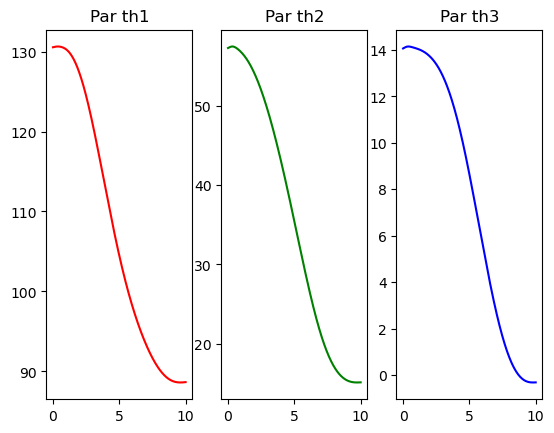

In [11]:
#Grados de libertad
eff_t = []
eff_0 = []
eff_1 = []
eff_2 = []
for i in range(len(tau_val)):
    eff_t.append(float(i) / frec)
    eff_0.append(tau_val[i][0])
    eff_1.append(tau_val[i][1])
    eff_2.append(tau_val[i][2])
fig, (eff_plt_1, eff_plt_2, eff_plt_3) = plt.subplots(nrows = 1, ncols = 3)    
#Gráficas GDL
eff_plt_1.set_title("Par th1")
eff_plt_1.plot(eff_t, eff_0, color = "RED")
eff_plt_2.set_title("Par th2")
eff_plt_2.plot(eff_t, eff_1, color = "GREEN")
eff_plt_3.set_title("Par th3")
eff_plt_3.plot(eff_t, eff_2, color = "BLUE")
plt.show()

### 8. Github
Para terminar, subir los archivos de la práctica al repositorio de github:
~~~ bash
repositorio_practicas/
├── practica_2
│   ├── imagenes
│   │   └── P2_IM1.png
│   └── Practica_2.ipynb
├── practica_3
│   ├── imagenes
│   │   └── P3_IM1.png
│   └── Practica_3.ipynb
└── README.md
~~~
**Dentro del archivo README.md (Creado de forma automática en el repositorio en línea), colocar los nombres de los integrantes del equipo.**

## Análisis de resultados

¿Qué utilidad tiene el modelo de dinámica inversa de un robot?
> RESPUESTA

## Conclusiones

En esta sección deberan escribir las conclusiones de la práctica con base en el objetivo planteado y las metas que se deban cumplir para su realización.

## Bibliografía 

En caso de usarse, se deben hacer referencia a la información implementada en formato ieee.


